<a href="https://colab.research.google.com/github/manojvenaram/TSA_EXP6/blob/main/TImESERIES6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
data=pd.read_csv("/content/AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [14]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [15]:
model = ExponentialSmoothing(data, trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
n_steps = 12

forecast = fit.forecast(steps=n_steps)
forecast

1961-01-01    451.577073
1961-02-01    427.257748
1961-03-01    464.699360
1961-04-01    500.103185
1961-05-01    508.660794
1961-06-01    567.713873
1961-07-01    647.897121
1961-08-01    632.460961
1961-09-01    534.374265
1961-10-01    484.930880
1961-11-01    418.459518
1961-12-01    471.058935
Freq: MS, dtype: float64

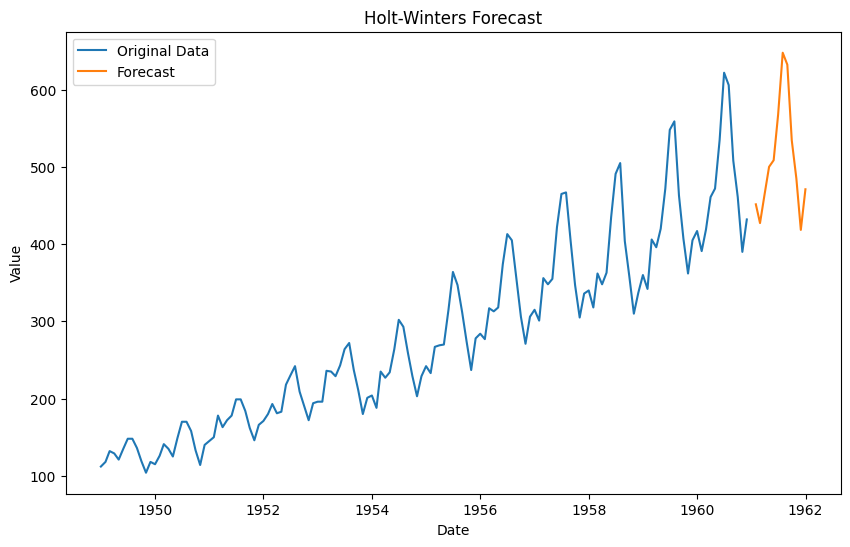

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Original Data')
plt.plot(pd.date_range(start=data.index[-1], periods=n_steps+1, freq='M')[1:], forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Holt-Winters Forecast')
plt.legend()
plt.show()